# CT5133: Deep Learning Assignment 1 2023

Student Name(s): <b>Soumitra Koustubh Manavi, Jash Prakash Rana</b> <br>

Student ID(s): <b>22220805, 22222806</b>

In [1]:
# Package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import warnings

# Display plots inline and change default figure size
%matplotlib inline

#To superseed any warnings by libraries, we are filtering out the warnings
warnings.filterwarnings('ignore')

In [2]:
# Use pandas to read the CSV file as a dataframe
moon_df = pd.read_csv("moons500.csv")
blob_df = pd.read_csv('blobs400.csv')

# The y values are those labelled 'Class': extract their values
y2 = moon_df['Class'].values
y1 = blob_df['Class'].values

# The x values are all other columns
del moon_df['Class']   # drop the 'Class' column from the dataframe
X2 = moon_df.values    # convert the remaining columns to a numpy array
del blob_df['Class']
X1 = blob_df.values

In [3]:
# Some examples of working with the Moon data, to look at rows/columns
print("For Blob Dataset:")
print ("len(X):", len(X1))            # outer array: one per sample
print ("len(X[0]):", len(X1[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X1[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X1)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y1))
print ("np.shape(y):", np.shape(y1))

# You can transpose the y data using 'reshape'
yt = np.reshape(y1, (len(y1),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

print("\n")

# Some examples of working with the Blob data, to look at rows/columns
print("For Blob Dataset:")
print ("len(X):", len(X2))            # outer array: one per sample
print ("len(X[0]):", len(X2[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X2[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X2)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y2))
print ("np.shape(y):", np.shape(y2))

# You can transpose the y data using 'reshape'
yt = np.reshape(y2, (len(y2),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

For Blob Dataset:
len(X): 400
len(X[0]): 3
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 3
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


For Blob Dataset:
len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
np.shape(y): (500,)
np.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


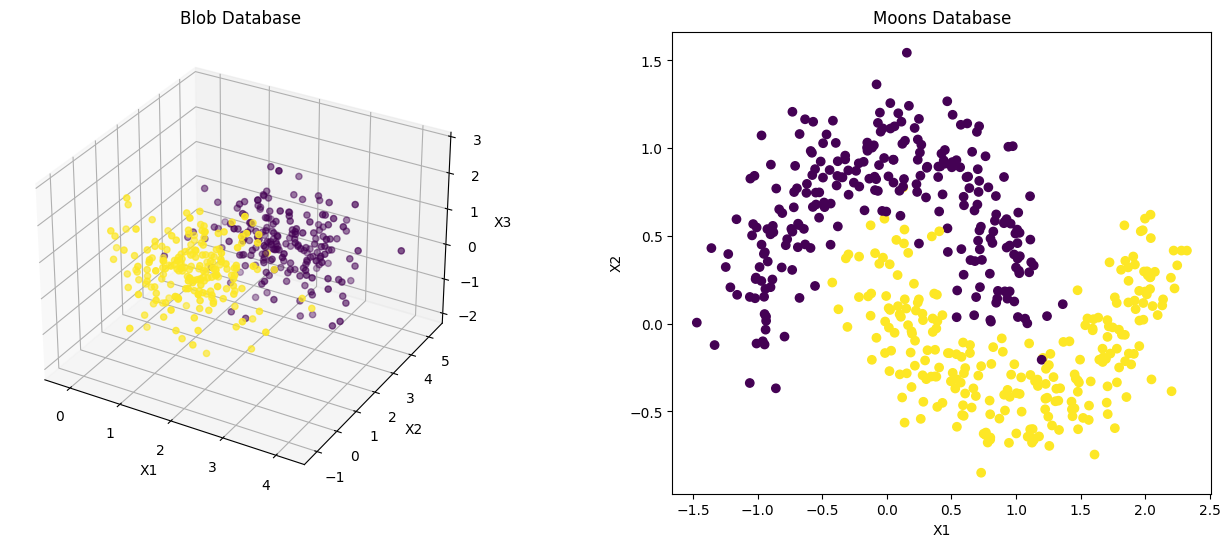

In [4]:
# plot X[0] vs X[1] and colour points according to the class, y
fig = plt.figure(figsize = (16,6))
axes = fig.add_subplot(1,2,1, projection='3d')
axes.scatter(X1[:,0], X1[:,1], X1[:,2], c=y1)
axes.set_title('Blob Database')
axes.set_xlabel('X1')
axes.set_ylabel('X2')
axes.set_zlabel('X3')

axes = fig.add_subplot(1,2,2)
axes.set_title('Moons Database')
axes.scatter(X2[:,0], X2[:,1], c=y2)
axes.set_xlabel('X1')
axes.set_ylabel('X2')


fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

plt.show()

In [5]:
#Splitting Blob Dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify = y1, random_state=42, shuffle=True)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, stratify = y1_test, random_state=42, shuffle=True)


In [6]:
X1_train

array([[ 1.00401242e+00,  1.80935488e+00,  4.61430468e-01],
       [ 1.23128895e+00,  5.31618052e+00, -3.81470044e-01],
       [ 5.34964746e-01,  3.68129928e-01,  2.03213843e-01],
       [ 1.65248423e+00,  2.17558161e+00, -1.35924055e+00],
       [ 1.76492401e+00,  1.03192358e+00,  4.96049252e-01],
       [ 1.03042169e+00, -1.15507377e+00, -3.87643714e-01],
       [ 6.89846290e-01,  4.83748186e-01,  9.67295041e-02],
       [ 2.69445671e-01,  5.15218691e-01, -3.57660656e-02],
       [ 2.70550133e+00,  9.02133341e-01, -2.37905577e-01],
       [ 6.43011527e-01,  3.37593042e+00, -2.68266174e-01],
       [ 1.96318378e+00,  3.92443734e+00, -8.22615996e-01],
       [ 2.43685606e+00,  4.23222163e+00, -4.78037627e-01],
       [ 2.21183714e+00,  4.37664528e+00,  1.01058572e+00],
       [ 1.02779056e+00,  4.30946741e+00, -1.03302199e+00],
       [ 2.37930757e+00,  4.16928864e+00,  7.31681340e-01],
       [ 2.60246467e-01,  6.03711854e-01,  2.02599819e+00],
       [ 2.04927811e+00,  3.09370448e+00

In [7]:
#Splitting Moon Dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify = y2, random_state=42, shuffle = True)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, stratify = y2_test, random_state=42, shuffle = True)

In [8]:
#Making a Logistic Regression Class
class LogisticRegressionNN(object):
    
    #Constructor to initialize iterations, learning rate, and if any random state
    def __init__ (self, lr = 0.01, max_iters = 1000, random_state = None):
        self.weights = None
        self.bias = None
        self.iterations = max_iters
        self.lr = lr

        # Set random state for shuffling and initializing the weights.
        if random_state:
            seed(random_state)

    #Sigmoid Activation Function
    def activation(self, X):
        z = np.dot(self.weights, X) + self.bias
        return 1/(1 + np.exp(-z))
    
    #Cost Function
    def cost_function(self, y, y_hat):
        cost = -(y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat))
        return cost

    #Stochastic Gradient Descent
    def gradient(self, X, y, y_hat):
        dW = np.dot(X,(y_hat - y))
        dB = (y_hat - y)
        self.weights -= np.dot(self.lr, dW)
        self.bias -= self.lr * dB 

    #Feed Forward/Training Phase
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.normal(loc = 0, scale = 0.1)
        prev_cost = 100000
        cost = 0
        
        for i in range(self.iterations):
            j = 1
            cost = 0
            for data, results in zip(X, y):
                y_hat = (self.activation(data))
                cost += self.cost_function(results, y_hat)
                self.gradient(data, results, y_hat)
                j+=1
            log_cost = cost / len(y)
            print("For Epoch ",i+1," Loop: ",j, "- Weights: ",self.weights,", Bias: ",self.bias,", Cost: ", log_cost)
    
            if prev_cost - log_cost < 10**-6:
                break
            else:
                prev_cost = log_cost
        
    def predict(self, X):
        self.result = []
        self.pred_proba = []
        for i in X:
            row = self.activation(i)
            self.pred_proba.append(row)
            self.result.append(np.where(row >= 0.5, 1, 0)) #Ref: https://www.bogotobogo.com/python/scikit-learn/Single-Layer-Neural-Network-Adaptive-Linear-Neuron-with-Stochastic-Gradient-Descent.php
        
        return np.array(self.result)

In [9]:
LRNN_blob = LogisticRegressionNN()

In [10]:
train_pred = LRNN_blob.fit(X1_train, y1_train)

For Epoch  1  Loop:  281 - Weights:  [ 0.19732127 -0.67355115  0.81424089] , Bias:  0.15375443650181084 , Cost:  0.542737095164614
For Epoch  2  Loop:  281 - Weights:  [ 0.39660414 -0.96697376  0.81834302] , Bias:  0.44802489480296936 , Cost:  0.3626753114597438
For Epoch  3  Loop:  281 - Weights:  [ 0.5274716  -1.18087223  0.8073868 ] , Bias:  0.6935057076146991 , Cost:  0.3040837338675069
For Epoch  4  Loop:  281 - Weights:  [ 0.61777915 -1.34822395  0.79066262] , Bias:  0.9070067411060297 , Cost:  0.2678506193915951
For Epoch  5  Loop:  281 - Weights:  [ 0.68235144 -1.48475481  0.77180685] , Bias:  1.097883827080584 , Cost:  0.24271282711467984
For Epoch  6  Loop:  281 - Weights:  [ 0.7294535  -1.5994592   0.75241646] , Bias:  1.271659414884673 , Cost:  0.223921279760286
For Epoch  7  Loop:  281 - Weights:  [ 0.7640981  -1.69794117  0.73325037] , Bias:  1.4318865023062177 , Cost:  0.20913892016841004
For Epoch  8  Loop:  281 - Weights:  [ 0.789531  -1.7839219  0.7146802] , Bias:  1.

In [11]:
y1_pred = LRNN_blob.predict(X1_test)

In [12]:
score = accuracy_score(y1_test, y1_pred)
score

0.9666666666666667

In [13]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [14]:
LRNN_moons = LogisticRegressionNN()

In [15]:
LRNN_moons.fit(X2_train,y2_train)

For Epoch  1  Loop:  351 - Weights:  [ 0.81043352 -0.16450041] , Bias:  -0.22252825167023477 , Cost:  0.6052336635115774
For Epoch  2  Loop:  351 - Weights:  [ 1.02406949 -0.62042599] , Bias:  -0.3024801834649157 , Cost:  0.4908031602621611
For Epoch  3  Loop:  351 - Weights:  [ 1.15086978 -0.97376851] , Bias:  -0.3301672426372571 , Cost:  0.43534240157706044
For Epoch  4  Loop:  351 - Weights:  [ 1.22944153 -1.26265844] , Bias:  -0.3304162782087815 , Cost:  0.40294341165396547
For Epoch  5  Loop:  351 - Weights:  [ 1.27872952 -1.5075413 ] , Bias:  -0.3155579603092728 , Cost:  0.38144744955687493
For Epoch  6  Loop:  351 - Weights:  [ 1.30924442 -1.7203667 ] , Bias:  -0.2921248215297148 , Cost:  0.36593087315394385
For Epoch  7  Loop:  351 - Weights:  [ 1.32732704 -1.90868284] , Bias:  -0.2638355146869608 , Cost:  0.3540736799416946
For Epoch  8  Loop:  351 - Weights:  [ 1.33702977 -2.07756391] , Bias:  -0.23293401313921844 , Cost:  0.34464771525307186
For Epoch  9  Loop:  351 - Weight

In [16]:
y2_pred = LRNN_moons.predict(X2_test)
score = accuracy_score(y2_test, y2_pred)
score

0.92

In [17]:

print(classification_report(y2_test,y2_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.92      0.92      0.92        37

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



#### Shallow Neural Network

In [18]:

class NEURAL_NET:
    def __init__(self, input_size,hidden_size,op_size,lr):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.op_size = op_size
        self.lr = lr

        self.w1 = np.random.uniform(low=0.0, high=1, size=(input_size,hidden_size))
        self.b1 = np.random.uniform(low=0.0, high=1, size=(1,hidden_size))
        self.w2 = np.random.uniform(low=0.0, high=1, size=(hidden_size,op_size))
        self.b2 = np.random.uniform(low=0.0, high=1, size=(1,op_size))

    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    def der_sigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    def loss_function(self, y, y_hat):
        loss = -1 * ((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)))
        return loss
    
    def forward_propagation(self,X):
        
        # print("W",self.w1)
        # print("B",self.b1)
        self.z_hidden = X @ self.w1+self.b1
        # print("Z",self.z_hidden)
        self.hidden_layer = self.sigmoid(self.z_hidden)
        # print("HL",self.hidden_layer)
        self.output_layer = self.sigmoid(self.hidden_layer @ self.w2+self.b2)
        
        return self.output_layer   
    
    def backward_propagation(self,X,y,output):
        error = output - y
        d_output = self.hidden_layer.T @ error

        error_hidden = self.der_sigmoid(self.z_hidden) * (error @ self.w2.T)
        d_hidden = X.T @ error_hidden
        # self.update_weights(d_output,error,d_hidden,error_hidden)
        self.w2 -= self.lr*d_output
        self.b2 -= self.lr*error
        self.w1 -= self.lr*d_hidden
        self.b1 -= self.lr*error_hidden
        
    def train(self,X,y,epochs):
        cost_per_itr=[]
        j_prev=10000
        for i in range(epochs):
            cost=0
            for j in range(len(X)):
                x = np.reshape(X[j], (1, self.input_size))
                # print("X",x)
                output=self.forward_propagation(x)
                self.backward_propagation(x,y[j],output)
                cost+=self.loss_function(y[j],output)  
                # print(cost) 
            cost_per_samples = cost/len(y)
            # print(cost_per_samples)
            # print("COST_LIST",cost_per_itr)
            # print("COST_LIST-mean",np.mean(cost_per_itr))
            if j_prev-cost_per_samples<1e-6:
                print(i)
                break
            else:
                j_prev=cost_per_samples
                print("PREV_COST",j_prev)

    def predict(self,X):
        prediction = []
        for i in range(len(X)):
            x = np.reshape(X[i], (1, self.input_size))
            output=self.forward_propagation(x)
            pred = 1 if output > 0.5 else 0
            prediction.append(pred)
        return prediction
    

#### Blob Dataset:

In [19]:
# print(X1_train)
# print(y1_train)
shl = NEURAL_NET(input_size=3,hidden_size=4,op_size=1,lr=0.01)
shl.train(X1_train,y1_train,1000)

PREV_COST [[0.8566531]]
PREV_COST [[0.70582863]]
PREV_COST [[0.69448992]]
PREV_COST [[0.67832714]]
PREV_COST [[0.6490284]]
PREV_COST [[0.60845853]]
PREV_COST [[0.56464317]]
PREV_COST [[0.51992267]]
PREV_COST [[0.47505232]]
PREV_COST [[0.43152629]]
PREV_COST [[0.39093979]]
PREV_COST [[0.35439574]]
PREV_COST [[0.32232929]]
PREV_COST [[0.29462815]]
PREV_COST [[0.27086767]]
PREV_COST [[0.25050846]]
PREV_COST [[0.23301209]]
PREV_COST [[0.21789446]]
PREV_COST [[0.2047434]]
PREV_COST [[0.19321835]]
PREV_COST [[0.18304255]]
PREV_COST [[0.17399278]]
PREV_COST [[0.16588939]]
PREV_COST [[0.15858761]]
PREV_COST [[0.15197028]]
PREV_COST [[0.14594209]]
PREV_COST [[0.14042497]]
PREV_COST [[0.13535449]]
PREV_COST [[0.13067712]]
PREV_COST [[0.12634801]]
PREV_COST [[0.12232929]]
PREV_COST [[0.11858876]]
PREV_COST [[0.11509884]]
PREV_COST [[0.11183573]]
PREV_COST [[0.10877879]]
PREV_COST [[0.10590995]]
PREV_COST [[0.10321335]]
PREV_COST [[0.10067496]]
PREV_COST [[0.09828232]]
PREV_COST [[0.09602429]]
PRE

In [20]:
pred1_val = shl.predict(X1_val)
score = accuracy_score(y1_val, pred1_val)
score

1.0

In [21]:
pred1_test = shl.predict(X1_test)
score = accuracy_score(y1_test, pred1_test)
score

0.9666666666666667

#### Moon Dataset:

In [22]:
shl1 = NEURAL_NET(input_size=2,hidden_size=3,op_size=1,lr=0.1)
shl1.train(X2_train,y2_train,1000)

PREV_COST [[0.646604]]
PREV_COST [[0.43618646]]
PREV_COST [[0.34274498]]
PREV_COST [[0.31554197]]
PREV_COST [[0.30746793]]
PREV_COST [[0.30495006]]
PREV_COST [[0.30409667]]
PREV_COST [[0.30374427]]
PREV_COST [[0.30353528]]
PREV_COST [[0.30335947]]
PREV_COST [[0.30318344]]
PREV_COST [[0.30299705]]
PREV_COST [[0.30279661]]
PREV_COST [[0.3025798]]
PREV_COST [[0.30234436]]
PREV_COST [[0.30208788]]
PREV_COST [[0.30180796]]
PREV_COST [[0.30150246]]
PREV_COST [[0.30116975]]
PREV_COST [[0.30080892]]
PREV_COST [[0.30041997]]
PREV_COST [[0.30000388]]
PREV_COST [[0.29956261]]
PREV_COST [[0.29909893]]
PREV_COST [[0.29861624]]
PREV_COST [[0.29811831]]
PREV_COST [[0.29760906]]
PREV_COST [[0.2970923]]
PREV_COST [[0.29657164]]
PREV_COST [[0.29605035]]
PREV_COST [[0.29553132]]
PREV_COST [[0.29501707]]
PREV_COST [[0.29450972]]
PREV_COST [[0.29401105]]
PREV_COST [[0.29352246]]
PREV_COST [[0.29304503]]
PREV_COST [[0.29257953]]
PREV_COST [[0.29212641]]
PREV_COST [[0.29168583]]
PREV_COST [[0.29125772]]
PREV

In [23]:
pred2_val = shl1.predict(X2_val)
score = accuracy_score(y2_val, pred2_val)
score

0.9733333333333334

In [24]:
pred2_val = shl1.predict(X2_test)
score = accuracy_score(y2_test, pred2_val)
score

1.0

Training on MNIST data:

In [25]:
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [26]:
(train_imgs, train_labels) = load_mnist('C:/Users/Admin/Downloads/MNIST/', 'train')
(test_imgs, test_labels) = load_mnist('C:/Users/Admin/Downloads/MNIST/', 't10k')

In [27]:
options = [0,9]

train_df = pd.DataFrame(train_imgs)
train_df['Labels'] = train_labels

filtered_train_Data = train_df[train_df['Labels'] .isin(options)] 

test_df = pd.DataFrame(test_imgs)
test_df['Labels'] = test_labels
filtered_test_Data = test_df[test_df['Labels'] .isin(options)] 

encode_labels = {0:0,9:1}
filtered_train_Data['Labels'] = filtered_train_Data['Labels'].map(encode_labels)
filtered_test_Data['Labels'] = filtered_test_Data['Labels'].map(encode_labels)

filtered_train_labels = filtered_train_Data['Labels']
filtered_train_imgs = filtered_train_Data.drop(['Labels'],axis=1)

filtered_test_labels = filtered_test_Data['Labels']
filtered_test_imgs = filtered_test_Data.drop(['Labels'],axis=1)
# print(np.array(filtered_train_imgs))
# print(np.array(filtered_train_labels))

In [28]:

class MNIST_NEURAL_NET:
    def __init__(self, input_size,hidden_size,op_size,lr):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.op_size = op_size
        self.lr = lr

        self.w1 = np.random.uniform(low=0.0, high=1, size=(input_size,hidden_size))
        self.b1 = np.random.uniform(low=0.0, high=1, size=(1,hidden_size))
        self.w2 = np.random.uniform(low=0.0, high=1, size=(hidden_size,op_size))
        self.b2 = np.random.uniform(low=0.0, high=1, size=(1,op_size))

    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    def der_sigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    def loss_function(self, y, y_hat):
        loss = -1 * ((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)))
        return loss
    
    def forward_propagation(self,X):
        
        # print("W",self.w1)
        # print("B",self.b1)
        self.z_hidden = X @ self.w1+self.b1
        # print("Z",self.z_hidden)
        self.hidden_layer = self.sigmoid(self.z_hidden)
        # print("HL",self.hidden_layer)
        self.output_layer = self.sigmoid(self.hidden_layer @ self.w2+self.b2)
        
        return self.output_layer   
    
    def backward_propagation(self,X,y,output):
        error = output - y
        d_output = self.hidden_layer.T @ error

        error_hidden = self.der_sigmoid(self.z_hidden) * (error @ self.w2.T)
        d_hidden = X.T @ error_hidden
        # self.update_weights(d_output,error,d_hidden,error_hidden)
        self.w2 -= self.lr*d_output
        self.b2 -= self.lr*error
        self.w1 -= self.lr*d_hidden
        self.b1 -= self.lr*error_hidden
        
    def train(self,X,y,epochs):
        # cost_per_itr=[]
        j_prev=10000
        for i in range(epochs):
            cost=0
            for j in range(len(X)):
                x = np.reshape(X[j], (1, self.input_size))
                # print("X",x)
                output=self.forward_propagation(x)
                self.backward_propagation(x,y[j],output)
                cost+=self.loss_function(y[j],output)  
                # print(cost) 
            cost_per_samples = cost/len(y)
            # print(cost_per_samples)
            # print("COST_LIST",cost_per_itr)
            # print("COST_LIST-mean",np.mean(cost_per_itr))
            if j_prev-cost_per_samples<1e-6:
                # print(i)
                break
            else:
                j_prev=cost_per_samples
                # print("PREV_COST",j_prev)

    def predict(self,X):
        prediction = []
        for i in range(len(X)):
            x = np.reshape(X[i], (1, self.input_size))
            output=self.forward_propagation(x)
            pred = 1 if output > 0.5 else 0
            prediction.append(pred)
        return prediction
    

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# print(filtered_train_imgs)
filtered_train_imgs1 = scaler.fit_transform(filtered_train_imgs)
filtered_test_imgs1 = scaler.fit_transform(filtered_test_imgs)


In [30]:
MNIST = MNIST_NEURAL_NET(input_size=784,hidden_size=785,op_size=1,lr=0.1)

MNIST.train(np.array(filtered_train_imgs1),np.array(filtered_train_labels),100)

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_imgs = MNIST.predict(np.array(filtered_test_imgs1))
print(np.array(predicted_imgs))
# print("labels",np.array(filtered_test_labels))
# print(classification_report(np.array(filtered_test_labels), predicted_imgs))
score = accuracy_score(np.array(filtered_test_labels), predicted_imgs)

Task 5: Soumitra